In [1]:
using Turing 
using Distributions
using Random
using Statistics
using StatsFuns

using CSVFiles
using DataFrames

using CairoMakie
using StatsPlots
CairoMakie.activate!()

### section 5-4
#### Poisson regression

In [2]:
df = DataFrame(load(File(format"CSV", "data-attendance-2.txt")))

# A: アルバイトが好き => 1, 嫌い => 0
# Score: 学問への興味: 0 ~ 200
# M: 総授業回数
# Y: 出席回数

Row,PersonID,A,Score,M,Y
,Int64,Int64,Int64,Int64,Int64
1,1,0,69,43,38
2,2,1,145,56,40
3,3,0,125,32,24
4,4,1,86,45,33
5,5,1,158,33,23
6,6,0,133,61,60
7,7,0,111,49,35
8,8,1,147,76,47
9,9,0,146,78,63


In [8]:
# A, Score をパラメータとする Poisson 分布によって M を予想する

@model function poisson_reg(A, Score, M)
    # prior distribution
    b_0 ~ Normal(0, 100)
    b_A ~ Normal(0, 100)
    b_score ~ Normal(0, 100)

    # scaling 
    score_scale = 200

    # model
    for i = 1 : length(A)
        θ = b_0 + b_A * A[i] + (b_score / score_scale) * Score[i]       # λ = exp(θ)
        M[i] ~ Poisson(exp(θ))
    end
end

poisson_reg (generic function with 2 methods)

In [9]:
A = df[!, :A]
Score = df[!, :Score]
M = df[!, :M]

chain = sample(poisson_reg(A, Score, M), NUTS(), 1000)

┌ Info: Found initial step size
└   ϵ = 0.2
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


Chains MCMC chain (1000×17×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 1.26 seconds
Compute duration  = 1.26 seconds
parameters        = b_0, b_A, b_score
internals         = n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size, lp, logprior, loglikelihood

Summary Statistics
  parameters      mean       std      mcse   ess_bulk   ess_tail      rhat   e ⋯
      Symbol   Float64   Float64   Float64    Float64    Float64   Float64     ⋯

         b_0    3.5746    0.0903    0.0048   360.9880   395.4058    1.0019     ⋯
         b_A    0.2628    0.0418    0.0019   464.1721   407.1278    0.9996     ⋯
     b_score    0.2951    0.1397    0.0073   364.0295   352.8264    1.0008     ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5

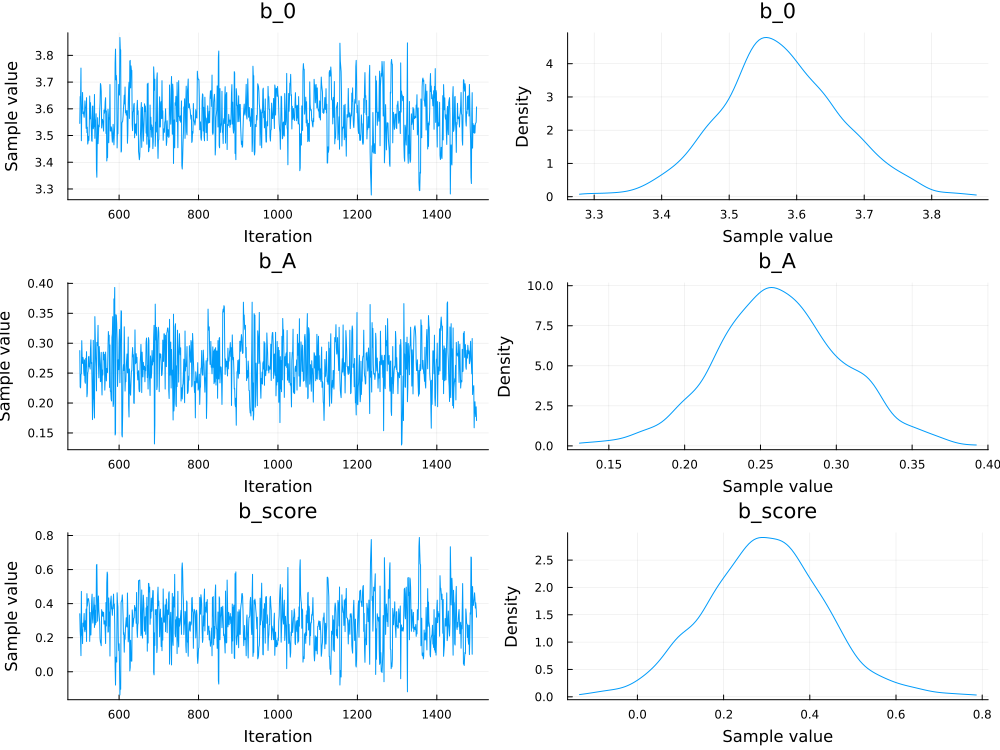

In [10]:
StatsPlots.plot(chain)